# SMS Spam Detection

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('spam.csv', encoding='ISO-8859-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
dataset.shape

(5572, 5)

# Data Cleaning 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Keep only the Required Columns
dataset = dataset[['v1','v2']]

In [6]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
dataset.shape

(5572, 2)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
dataset.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
# Rename the Columns
dataset.rename(columns = {'v1':'Spam' , 'v2': 'Text'}, inplace = True)
dataset.head()

,Spam,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#Encoding The Data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['Spam'] = encoder.fit_transform(dataset['Spam'])

In [12]:
dataset.head()

,Spam,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
dataset.isnull().sum()

Spam    0
Text    0
dtype: int64

In [14]:
dataset.duplicated().sum()

403

In [15]:
# Remove all the Duplicates
dataset = dataset.drop_duplicates(keep = 'first')
dataset.head()

,Spam,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
dataset.shape

(5169, 2)

In [17]:
dataset.duplicated().sum()

0

In [18]:
import nltk

# EDA

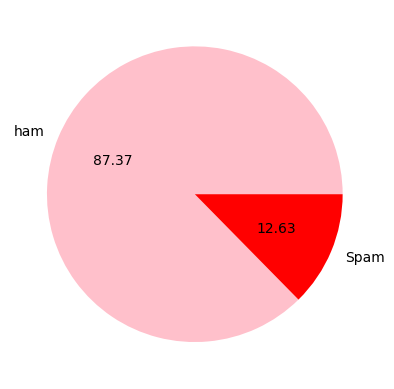

In [19]:
labels = ['ham' , 'Spam']
colors = ['Pink', 'red']
plt.pie(dataset['Spam'].value_counts() , labels = labels, colors = colors , autopct = '%0.2f')
plt.show()

In [20]:
dataset['Total_chars'] = dataset['Text'].apply(len)
dataset.head()

,Spam,Text,Total_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
dataset['Total_words'] = dataset['Text'].apply(lambda x : len(nltk.word_tokenize(x)))
dataset.head()

,Spam,Text,Total_chars,Total_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
dataset['Total_sentences'] = dataset['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))
dataset.head()

,Spam,Text,Total_chars,Total_words,Total_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
dataset.iloc[:,2:].describe()

,Total_chars,Total_words,Total_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
dataset[dataset['Spam'] == 0].iloc[:,2:].describe()

,Total_chars,Total_words,Total_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
dataset[dataset['Spam'] == 1].iloc[:,2:].describe()

,Total_chars,Total_words,Total_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='Total_chars', ylabel='Count'>

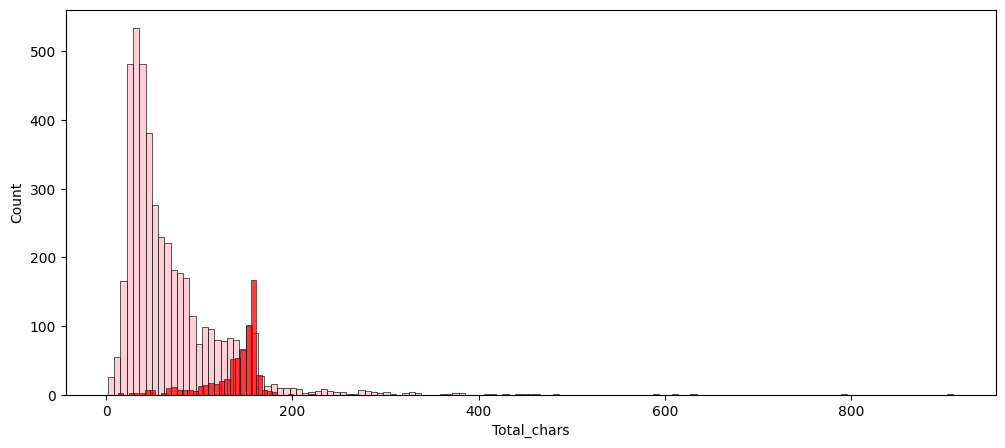

In [26]:
plt.figure(figsize = (12, 5))

sns.histplot(dataset[dataset['Spam'] == 0]['Total_chars'], color = 'pink')
sns.histplot(dataset[dataset['Spam'] == 1]['Total_chars'], color = 'red')

<Axes: xlabel='Total_words', ylabel='Count'>

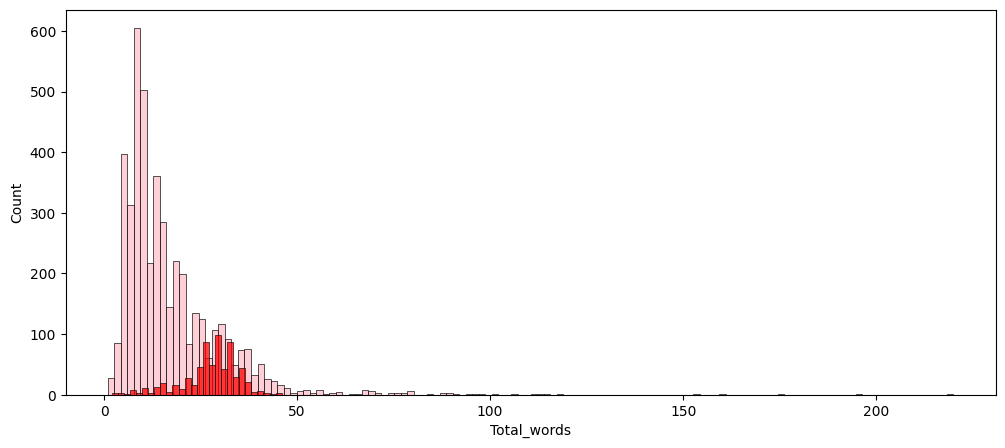

In [27]:
plt.figure(figsize = (12, 5))

sns.histplot(dataset[dataset['Spam'] == 0]['Total_words'], color = 'pink')
sns.histplot(dataset[dataset['Spam'] == 1]['Total_words'], color = 'red')

<Axes: xlabel='Total_sentences', ylabel='Count'>

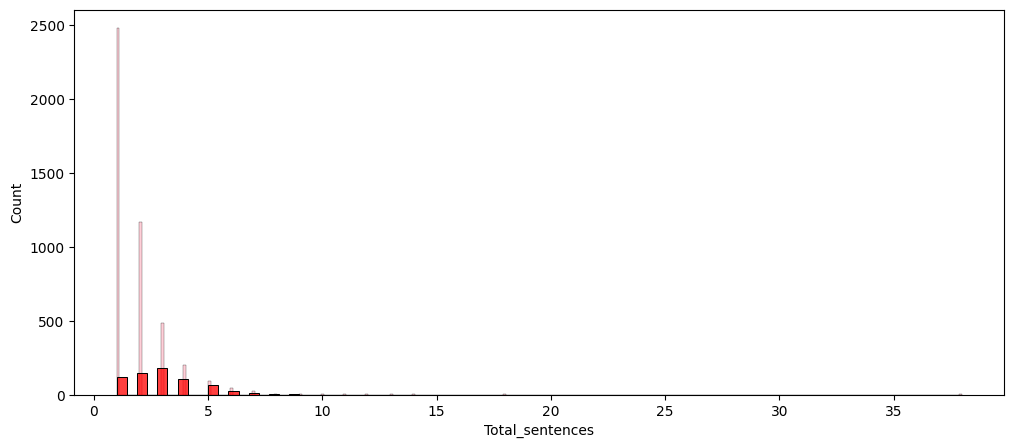

In [28]:
plt.figure(figsize = (12, 5))

sns.histplot(dataset[dataset['Spam'] == 0]['Total_sentences'], color = 'pink')
sns.histplot(dataset[dataset['Spam'] == 1]['Total_sentences'], color = 'red')

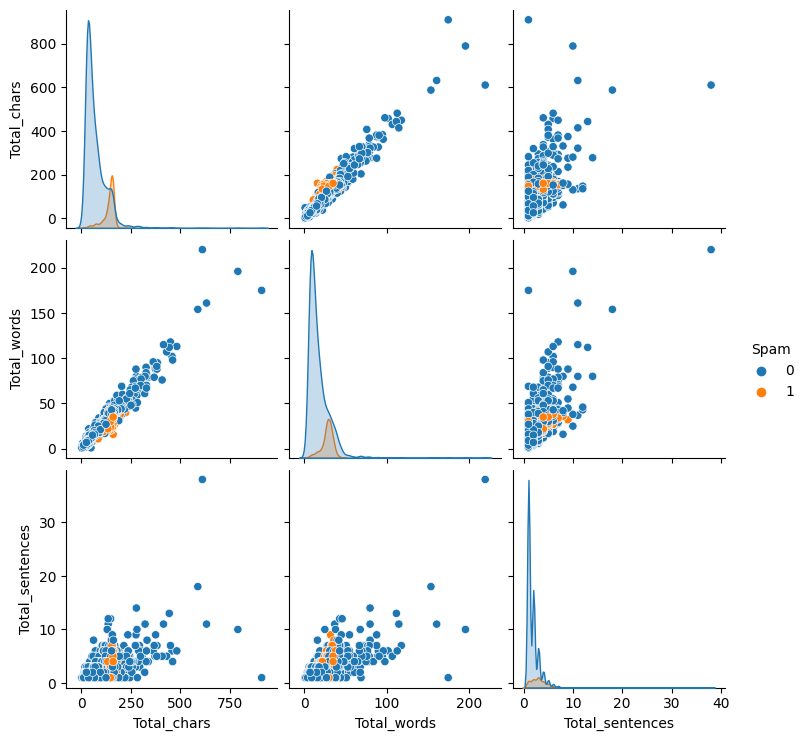

In [29]:
sns.pairplot(dataset , hue = 'Spam')

C:\Users\harsh\AppData\Local\Temp\ipykernel_7068\2571642465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot = True)


<Axes: >

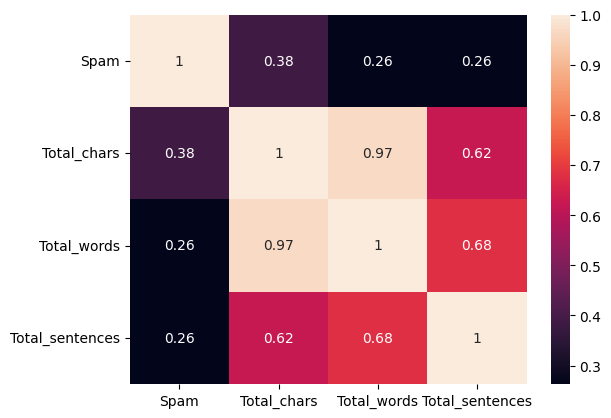

In [30]:
sns.heatmap(dataset.corr(), annot = True)

# Data Preprocessing


In [31]:
from nltk.corpus import stopwords
import string

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [34]:
# Function to do all the following transformation to the text to make it compatible for the model
# Lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation
# Stemming

def text_transformation(text):
    
    # Converting to Lower Case
    text = text.lower()
    
    # Tokenization
    text = nltk.word_tokenize(text)
    
    # Removing Special Characters 
    lst = []
    for i in text:
        if i.isalnum():
            lst.append(i)
    
    
    # Removing stop words and punctuation
    text = lst[:]
    lst = []
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            lst.append(i)
    
    # Stemming    
    text = lst[:]
    lst = []
    
    for i in text:
        lst.append(ps.stem(i))
    
    
    return ' '.join(lst)

In [35]:
# Apply the Transformation Function
dataset['Transformed_text'] = dataset['Text'].apply(text_transformation)
dataset.head()

,Spam,Text,Total_chars,Total_words,Total_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
spam_words = []
spam_msgs = dataset[dataset['Spam'] == 1]['Transformed_text'].tolist()
for i in spam_msgs:
    for j in i.split():
        spam_words.append(j)

In [37]:
from collections import Counter

In [38]:
c1 = pd.DataFrame(Counter(spam_words).most_common(50))

In [39]:
c1.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


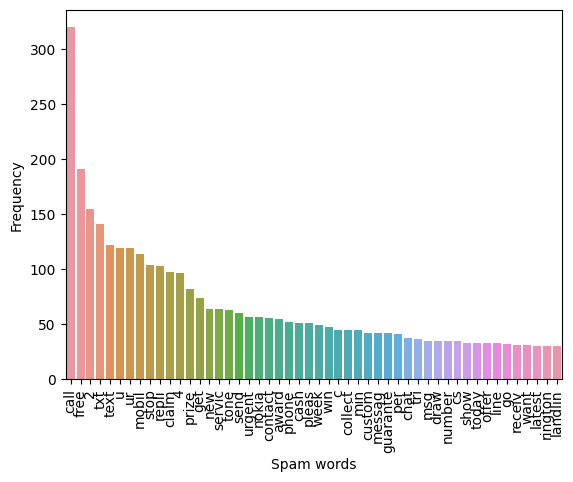

In [40]:

sns.barplot(x = c1[0] , y = c1[1], data = c1)
plt.xticks(rotation = 'vertical')
plt.xlabel('Spam words')
plt.ylabel('Frequency')
plt.show()

In [41]:
ham_words = []
ham_msgs = dataset[dataset['Spam'] == 0]['Transformed_text'].tolist()
for i in ham_msgs:
    for j in i.split():
        ham_words.append(j)

In [42]:
c2 = pd.DataFrame(Counter(spam_words).most_common(50))
c2.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


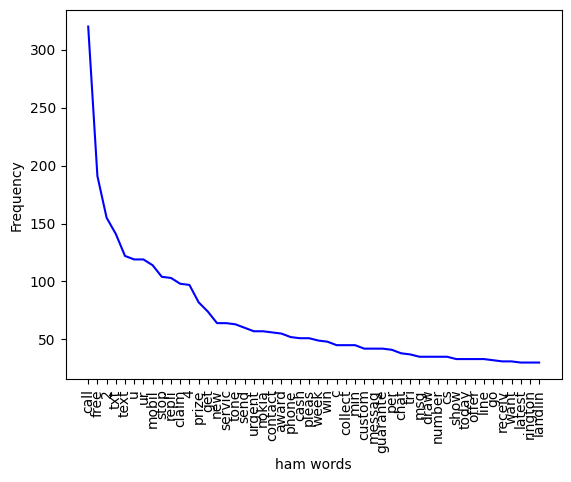

In [43]:
sns.lineplot(x = c2[0] , y = c2[1], data = c2, color = 'Blue')
plt.xticks(rotation = 'vertical')
plt.xlabel('ham words')
plt.ylabel('Frequency')
plt.show()

# Model Building

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [46]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB , BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Bag of Words

In [47]:
X_cv = cv.fit_transform(dataset['Transformed_text']).toarray()
X_cv[10]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
X_cv.shape

(5169, 6708)

In [49]:
y_cv = dataset['Spam'].values
y_cv[:10]

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [50]:
X_train_cv , X_test_cv , y_train_cv , y_test_cv = train_test_split(X_cv, y_cv , test_size = 0.2, random_state = 2)

In [51]:
gnb.fit(X_train_cv , y_train_cv)
y_pred_gnb_cv = gnb.predict(X_test_cv)
print('Accuracy Score for GNB & cv = ', accuracy_score(y_test_cv , y_pred_gnb_cv ))
print('Confusion Matrix for GNB & cv  is : \n', confusion_matrix(y_test_cv  , y_pred_gnb_cv ))
print('Precision Score for GNB & cv  = ', precision_score(y_test_cv  , y_pred_gnb_cv ))

Accuracy Score for GNB & cv =  0.8800773694390716
Confusion Matrix for GNB & cv  is : 
 [[792 104]
 [ 20 118]]
Precision Score for GNB & cv  =  0.5315315315315315


In [52]:
mnb.fit(X_train_cv  , y_train_cv )
y_pred_mnb_cv  = mnb.predict(X_test_cv )
print('Accuracy Score for MNB & cv  = ', accuracy_score(y_test_cv  , y_pred_mnb_cv ))
print('Confusion Matrix for MNB & cv  is : \n', confusion_matrix(y_test_cv  , y_pred_mnb_cv ))
print('Precision Score for MNB & cv  = ', precision_score(y_test_cv  , y_pred_mnb_cv ))

Accuracy Score for MNB & cv  =  0.9642166344294004
Confusion Matrix for MNB & cv  is : 
 [[871  25]
 [ 12 126]]
Precision Score for MNB & cv  =  0.8344370860927153


In [53]:
bnb.fit(X_train_cv  , y_train_cv ) 
y_pred_bnb_cv  = bnb.predict(X_test_cv )
print('Accuracy Score for BNB & cv  = ', accuracy_score(y_test_cv  , y_pred_bnb_cv ))
print('Confusion Matrix for BNB & cv  is : \n', confusion_matrix(y_test_cv  , y_pred_bnb_cv ))
print('Precision Score for BNB & cv  = ', precision_score(y_test_cv  , y_pred_bnb_cv ))

Accuracy Score for BNB & cv  =  0.9700193423597679
Confusion Matrix for BNB & cv  is : 
 [[893   3]
 [ 28 110]]
Precision Score for BNB & cv  =  0.9734513274336283


# TFIDF

In [54]:
X_tfidf = tfidf.fit_transform(dataset['Transformed_text']).toarray()
X_tfidf[10]

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
X_tfidf.shape

(5169, 3000)

In [56]:
y_tfidf = dataset['Spam'].values
y_tfidf[:10]

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [57]:
X_train_tfidf , X_test_tfidf , y_train_tfidf , y_test_tfidf = train_test_split(X_tfidf, y_tfidf , test_size = 0.2, random_state = 2)

In [58]:
gnb.fit(X_train_tfidf , y_train_tfidf)
y_pred_gnb_tfidf = gnb.predict(X_test_tfidf)
print('Accuracy Score for GNB & tfidf = ', accuracy_score(y_test_tfidf , y_pred_gnb_tfidf ))
print('Confusion Matrix for GNB & tfidf is : \n', confusion_matrix(y_test_tfidf  , y_pred_gnb_tfidf ))
print('Precision Score for GNB & tfidf = ', precision_score(y_test_tfidf  , y_pred_gnb_tfidf ))

Accuracy Score for GNB & tfidf =  0.8694390715667312
Confusion Matrix for GNB & tfidf is : 
 [[788 108]
 [ 27 111]]
Precision Score for GNB & tfidf =  0.5068493150684932


In [59]:
mnb.fit(X_train_tfidf  , y_train_tfidf )
y_pred_mnb_tfidf = mnb.predict(X_test_tfidf )
print('Accuracy Score for MNB & tfidf= ', accuracy_score(y_test_tfidf  , y_pred_mnb_tfidf ))
print('Confusion Matrix for MNB & tfidf is : \n', confusion_matrix(y_test_tfidf  , y_pred_mnb_tfidf ))
print('Precision Score for MNB & tfidf = ', precision_score(y_test_tfidf  , y_pred_mnb_tfidf ))

Accuracy Score for MNB & tfidf=  0.9709864603481625
Confusion Matrix for MNB & tfidf is : 
 [[896   0]
 [ 30 108]]
Precision Score for MNB & tfidf =  1.0


In [60]:
bnb.fit(X_train_tfidf , y_train_tfidf ) 
y_pred_bnb_tfidf  = bnb.predict(X_test_tfidf )
print('Accuracy Score for BNB & tfidf = ', accuracy_score(y_test_tfidf  , y_pred_bnb_tfidf ))
print('Confusion Matrix for BNB is & tfidf : \n', confusion_matrix(y_test_tfidf  , y_pred_bnb_tfidf ))
print('Precision Score for BNB & tfidf = ', precision_score(y_test_tfidf  , y_pred_bnb_tfidf ))

Accuracy Score for BNB & tfidf =  0.9835589941972921
Confusion Matrix for BNB is & tfidf : 
 [[895   1]
 [ 16 122]]
Precision Score for BNB & tfidf =  0.991869918699187


We Wanted the best precision so: TFIDF with MNB is the best of the Naive Bayes Theorem.

# Trying on Various Machine Learning Models

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [62]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [63]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [64]:
# Function to return Accuracy and Precision on various models
def classifier(clf ,X_train_tfidf ,y_train_tfidf ,X_test_tfidf ,y_test_tfidf):
    clf.fit(X_train_tfidf,y_train_tfidf)
    y_pred_tfidf = clf.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test_tfidf ,y_pred_tfidf)
    precision = precision_score(y_test_tfidf ,y_pred_tfidf)
    
    return accuracy , precision

In [65]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = classifier(clf, X_train_tfidf ,y_train_tfidf ,X_test_tfidf ,y_test_tfidf)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [66]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [67]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


MNB Will be Used as it has the best precision and a good enough accuracy

# Exporting the Data to pickle File

In [69]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))